# Module 7 Final Project --- Hanchao Zhao

# Predict House Sale Prices

**Hanchao Zhao**



# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project is to build a linear regression model to predict housing prices. The model is trained on a dataset of 100 houses and uses the numeric variables to build the linear regression. The platform that the model lives is Python, and uses the following packages:

pandas

numpy

matplotlib.pyplot 

scipy. stats, norm

sklearn, linear_model

[Back to top](#Index)


## 1. Introduction


### Determin what variables to use

The data set contains two major types of data: numerica and catagorical. This model uses only the numerical data as catagorical data does not suit linear regression.

I will then calculate the correlation of each numerica variable to SalePrice to do another round of filtering.

### Linear Regression Design

I will then design a few linear regression solutions using different combination of variables and execute them.

### Design Verification

I will then use the different solutions to test against the data to find the one that has the highest score.

### Final Test

Finally, I will test the model against the test data.



[Back to top](#Index)

## 2. The Data

[Back to top](#Index)

### 2.1 Import the Data

In [197]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy. stats import norm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# import data
data = pd.read_csv('houseSmallData.csv')

# randomly select 40 records as the training data
train = data.sample(n=40)

[Back to top](#Index)

### 2.2 Data Exploration


In [216]:
# selecting all numeric variables in the table
numeric = train.select_dtypes(include=[np.number])

# calculate the correlation of the numeric variables to SalePrice
corr = numeric.corr()

# sort the correlation of each variable to SalePrice based on the positive correlation
cols=corr['SalePrice'].sort_values(ascending=False)
cols # show the full list

# see the mark down cell below

SalePrice        1.000000
OverallQual      0.782167
GrLivArea        0.774563
FullBath         0.698591
YearBuilt        0.627526
TotalBsmtSF      0.620109
Fireplaces       0.602394
GarageArea       0.602330
TotRmsAbvGrd     0.570477
WoodDeckSF       0.568971
BsmtUnfSF        0.558308
GarageYrBlt      0.555520
YearRemodAdd     0.555004
MasVnrArea       0.537535
GarageCars       0.531012
2ndFlrSF         0.477989
BedroomAbvGr     0.454977
1stFlrSF         0.438813
OpenPorchSF      0.390415
LotArea          0.385025
LotFrontage      0.367156
HalfBath         0.317259
MSSubClass       0.225542
MoSold           0.160963
BsmtFinSF1       0.112347
BsmtFullBath     0.022310
BsmtHalfBath    -0.017849
ScreenPorch     -0.077761
BsmtFinSF2      -0.088715
OverallCond     -0.134787
LowQualFinSF    -0.148455
EnclosedPorch   -0.186788
YrSold          -0.192213
Id              -0.238975
Unnamed: 0      -0.238975
KitchenAbvGr    -0.266939
MiscVal         -0.310244
3SsnPorch             NaN
PoolArea    

#### Filtering Result

##### Here are the variables that have over 0.55 of correlation to SalePrice:

OverallQual     0.835259

YearBuilt       0.767860

GrLivArea       0.758063

FullBath        0.744325

GarageArea      0.734874

GarageYrBlt     0.712598

TotRmsAbvGrd    0.708217

GarageCars      0.700708

YearRemodAdd    0.667183

TotalBsmtSF     0.666248

MasVnrArea      0.597977

LotFrontage     0.583204

1stFlrSF        0.554608

# Now I am going to plot out the top five of them against the SalePrice

Text(0.5, 0, 'OverallQual')

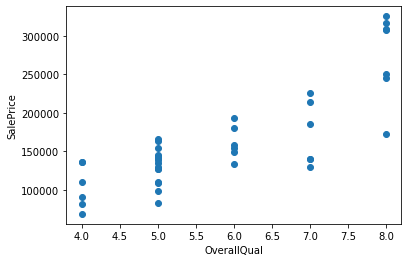

In [31]:
# OverallQual

X = train['OverallQual']
Y = train['SalePrice']

plt.scatter(X,Y)
plt.ylabel('SalePrice')
plt.xlabel('OverallQual')

Text(0.5, 0, 'YearBuilt')

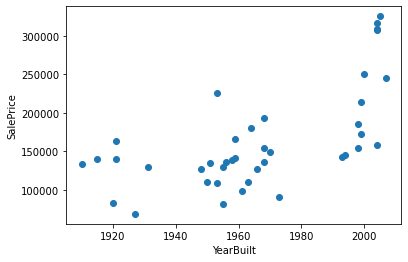

In [32]:
# YearBuilt

X = train['YearBuilt']
Y = train['SalePrice']

plt.scatter(X,Y)
plt.ylabel('SalePrice')
plt.xlabel('YearBuilt')

Text(0.5, 0, 'GrlivArea')

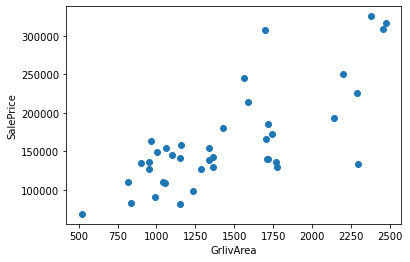

In [33]:
# GrLivArea

X = train['GrLivArea']
Y = train['SalePrice']

plt.scatter(X,Y)
plt.ylabel('SalePrice')
plt.xlabel('GrlivArea')

Text(0.5, 0, 'FullBath')

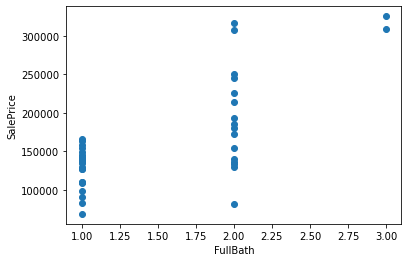

In [34]:
# FullBath

X = train['FullBath']
Y = train['SalePrice']

plt.scatter(X,Y)
plt.ylabel('SalePrice')
plt.xlabel('FullBath')

Text(0.5, 0, 'GarageArea')

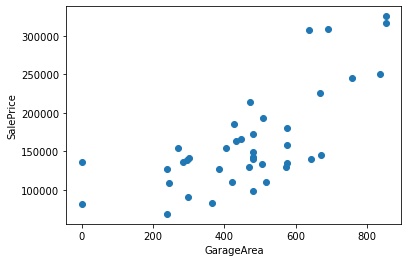

In [35]:
# GarageArea

X = train['GarageArea']
Y = train['SalePrice']

plt.scatter(X,Y)
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')

[Back to top](#Index)

### 2.3 Data Preparation

Data cleaning. Drop the columns with NaN correlation. Fill all NaN entries with mean.

[Back to top](#Index)

### 2.4 Correlation

As we have seen from above, I have filtered out the variables that has over 0.55 of correlation against the SalePrice. However, this does not mean that I am going to use all of these varaibles in my final model. Instead, I am going to build three separate trail-models to find the one that works the best:

1. Using all of these selected variables
2. Using only the top 5 variables that have the highest correlation
3. Using all variables that have over 0.60 of correlation


[Back to top](#Index)

## 3. Project Description

### Model Training Data

Instead of just using 20 rows of data, I am going to randomly select 20 rows of data 100 times and concat them into a training data of 2000 rows.

### Multiple Models Competition

I am going to build four separate trail-models to find the one that works the best:

1. Using all of these selected variables (Control)
2. Using only the top 5 variables that have the highest correlation
3. Using all variables that have over 0.60 of correlation
4. Using all variables that have over 0.55 of correlation

[Back to top](#Index)

### 3.1 Linear Regression

Give a description (500 or less words) of the algorithm you use in this project. Include mathematical and computational details about linear regression.

Include details about the theory (origin of the method, derivation, and formulas) and the necessary steps to implement the algorithm using Python.



In [217]:
# generate model training data
samples = []
for i in range(100):
    # Randomly select 20 rows
    random_sample = data.sample(n=20)
    # Append the sample to the list
    samples.append(random_sample)

# Concatenate the samples into a single DataFrame
training = pd.concat(samples)


# Clean the data
training.drop('PoolQC', axis=1, inplace=True)
training.drop('PoolArea', axis=1, inplace=True)
training.drop('3SsnPorch', axis=1, inplace=True)
training=training.fillna(training.mean()) # replace missing values with mean


# Check the result
training.shape

C:\Users\hanch\AppData\Local\Temp\ipykernel_17768\4045695009.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training=training.fillna(training.mean()) # replace missing values with mean


(2000, 79)

In [218]:
# Variables selection

# selecting all numeric variables in the table
numeric = training.select_dtypes(include=[np.number])

# calculate the correlation of the numeric variables to SalePrice
corr = numeric.corr()

# sort the correlation of each variable to SalePrice based on the positive correlation
cols=corr['SalePrice'].sort_values(ascending=False)

# Three groups of variables
moreThan55 = corr['SalePrice'].sort_values(ascending=False)[corr['SalePrice']>0.55].index
moreThan60 = corr['SalePrice'].sort_values(ascending=False)[corr['SalePrice']>0.60].index
top5 = corr['SalePrice'].sort_values(ascending=False)[0:6].index

# And a control of using all the variables
allIn = corr['SalePrice'].sort_values(ascending = False).index

### Reason to select 20 random rows 100 times

This is based on Central Limit Theorem. The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacementtext annotation indicator, then the distribution of the sample means will be approximately normally distributed. This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually n > 30). If the population is normal, then the theorem holds true even for samples smaller than 30. In fact, this also holds true even if the population is binomial, provided that min(np, n(1-p))> 5, where n is the sample size and p is the probability of success in the population. This means that we can use the normal probability model to quantify uncertainty when making inferences about a population mean based on the sample mean.



### Multiple Linear Regression

Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. Every value of the independent variable x is associated with a value of the dependent variable y. The population regression line for p explanatory variables x1, x2, ... , xp is defined to be y = 0 + 1x1 + 2x2 + ... + pxp. This line describes how the mean response y changes with the explanatory variables. The observed values for y vary about their means y and are assumed to have the same standard deviation . The fitted values b0, b1, ..., bp estimate the parameters 0, 1, ..., p of the population regression line.
Since the observed values for y vary about their means y, the multiple regression model includes a term for this variation. In words, the model is expressed as DATA = FIT + RESIDUAL, where the "FIT" term represents the expression 0 + 1x1 + 2x2 + ... pxp. The "RESIDUAL" term represents the deviations of the observed values y from their means y, which are normally distributed with mean 0 and variance . The notation for the model deviations is .

Formally, the model for multiple linear regression, given n observations, is
yi = 0 + 1xi1 + 2xi2 + ... pxip + i for i = 1,2, ... n.

In the least-squares model, the best-fitting line for the observed data is calculated by minimizing the sum of the squares of the vertical deviations from each data point to the line (if a point lies on the fitted line exactly, then its vertical deviation is 0). Because the deviations are first squared, then summed, there are no cancellations between positive and negative values. The least-squares estimates b0, b1, ... bp are usually computed by statistical software.

The values fit by the equation b0 + b1xi1 + ... + bpxip are denoted i, and the residuals ei are equal to yi - i, the difference between the observed and fitted values. The sum of the residuals is equal to zero.

The variance ² may be estimated by s² = , also known as the mean-squared error (or MSE).
The estimate of the standard error s is the square root of the MSE.

In this analysis, since we are using multiple columns to predict SalePrice, so we are treating those columns as independent variables, and SalePrice as the dependent variable.

Model Score of Using Top 5 Variables: 0.8371712148277015
Coefficients: [22251.43206693    46.48139894    57.80537938 -8007.07192538
   593.01021796]


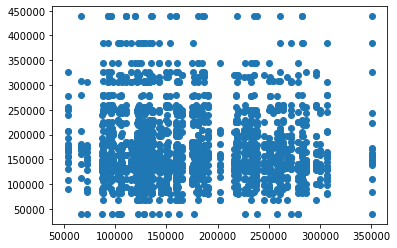

In [219]:
# top5 model linear regression

X = training[top5]
Y = training['SalePrice']
X = X.drop(['SalePrice'], axis=1)

from sklearn import linear_model
lr = linear_model.LinearRegression()
T5model = lr.fit(X,Y)
T5predictions = T5model.predict(X)

score = T5model.score(X,Y)

# Get the coefficients of the linear regression model
coefficients = T5model.coef_


print("Model Score of Using Top 5 Variables:", model.score(X,Y))
print("Coefficients:", coefficients)

plt.scatter(predictions, Y)

Model Score of using those who have over 0.55 of correlation: 0.8569469576720058
Coefficients: [ 1.98137823e+04  5.08402102e+01  3.51132205e+01 -1.22767120e+03
  5.47105042e+02  2.11593768e+01 -9.44088364e+01 -7.99252142e+03
  1.36088881e+01 -1.71294600e+03  2.26651453e+02]


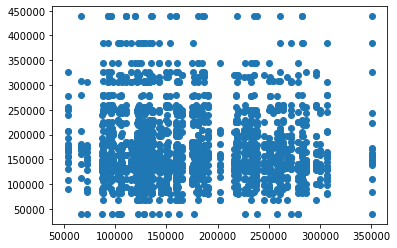

In [220]:
# moreThan55 model linear regression
X = training[moreThan55]
Y = training['SalePrice']
X = X.drop(['SalePrice'], axis=1)

from sklearn import linear_model
lr = linear_model.LinearRegression()
C55model = lr.fit(X,Y)
C55predictions = C55model.predict(X)

score55 = C55model.score(X,Y)

# Get the coefficients of the linear regression model
coefficients = C55model.coef_


print("Model Score of using those who have over 0.55 of correlation:", C55model.score(X,Y))
print("Coefficients:", coefficients)

plt.scatter(predictions, Y)

Model Score of those who have more than 0.60 of correlation: 0.852164207704033
Coefficients: [19453.99231423    42.09850994    36.08869113  -187.55276303
   529.42093607    27.38933606]


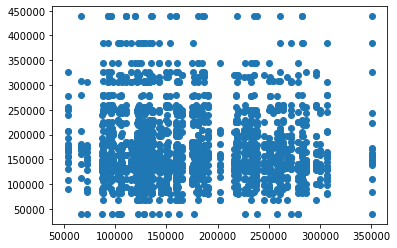

In [221]:
# moreThan60 model linear regression
X = training[moreThan60]
Y = training['SalePrice']
X = X.drop(['SalePrice'], axis=1)

from sklearn import linear_model
lr = linear_model.LinearRegression()
C60model = lr.fit(X,Y)
C60predictions = C60model.predict(X)

score60 = C60model.score(X,Y)

# Get the coefficients of the linear regression model
coefficients = C60model.coef_


print("Model Score of those who have more than 0.60 of correlation:", C60model.score(X,Y))
print("Coefficients:", coefficients)

plt.scatter(predictions, Y)

Model Score of all variables: 0.9083293391752174
Coefficients: [ 1.47720528e+04  4.78449174e+01  3.83934688e+01 -7.79800693e+03
  5.82784512e+02  2.26695108e+00 -2.89911210e+01  7.52422618e+03
  1.71318660e+01  2.92760940e+03  2.28296991e+02  3.91991180e+00
  1.02216389e+04  1.56093024e+00  6.03680195e+00  4.28984579e+00
  1.71191312e+03  2.82910524e+00  2.97966723e+01 -4.11411972e+01
  4.65251257e+02 -5.15168673e+00 -1.65407638e+04  6.48090905e+03
 -1.26764383e+02 -1.64880466e+02  3.07863442e+03  4.58953255e+00
 -4.36662136e+01  8.65193824e+03  3.96351598e+01  3.35588676e+00
  3.35588677e+00  6.92099964e+02 -5.53005126e+01 -1.62731945e+03]


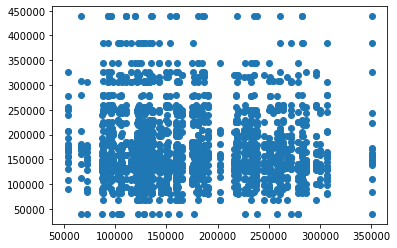

In [222]:
# allIn model linear regression
X = training[allIn]
Y = training['SalePrice']
X = X.drop(['SalePrice'], axis=1)

from sklearn import linear_model
lr = linear_model.LinearRegression()
allmodel = lr.fit(X,Y)
allpredictions = allmodel.predict(X)

scoreControl = allmodel.score(X,Y)

# Get the coefficients of the linear regression model
coefficients = allmodel.coef_


print("Model Score of all variables:", allmodel.score(X,Y))
print("Coefficients:", coefficients)

plt.scatter(predictions, Y)

[Back to top](#Index)

### 3.2 Analysis 

As I have demonstrated in the step above, I have built linear regressions based on 4 groups of variables. And the score against the training data of each of these models is shown below:

- Model Score of Using Top 5 Variables:                         0.832

- Model Score of using those who have over 0.55 of correlation: 0.858

- Model Score of those who have more than 0.60 of correlation:  0.853

- Model Score of all variables:                                 0.903


[Back to top](#Index)

### 3.3 Results

Based on the score test, each model has the follow scores

- Model Score of Using Top 5 Variables:                         0.832

- Model Score of using those who have over 0.55 of correlation: 0.858

- Model Score of those who have more than 0.60 of correlation:  0.853

- Model Score of all variables:                                 0.903


allIn model has the highest score. And as a matter of fact, the more variable the model used, the higher the score the model achieved.

The reason of this phenomenon is that, I have already selected the datapoints that have a meanful correlation with SalePrice. As a result, the more of them I use, the more accurate the model.

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a prediction model, it's time to test your model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

In [223]:
# import the jtest dataset

jtest = pd.read_csv('jtest.csv')


jtest.drop('PoolQC', axis=1, inplace=True)
jtest.drop('PoolArea', axis=1, inplace=True)
jtest.drop('3SsnPorch', axis=1, inplace=True)


jtest=jtest.fillna(training.mean()) # replace missing values with mean

jtest.head()



C:\Users\hanch\AppData\Local\Temp\ipykernel_17768\731984576.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  jtest=jtest.fillna(training.mean()) # replace missing values with mean


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,72.032147,10603,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.000000,9206,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.000000,7018,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.000000,10402,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,72.032147,7758,Pave,NaN,Reg,Lvl,...,0,184,NaN,NaN,0,6,2007,WD,Normal,169500


In [224]:
# redefine the allIn model

X = training[allIn]
Y = training['SalePrice']
X = X.drop(['SalePrice'], axis=1)

from sklearn import linear_model
lr = linear_model.LinearRegression()
allmodel = lr.fit(X,Y)
allpredictions = allmodel.predict(X)

In [225]:
# jtest dataset prep

# selecting all numeric variables in the table
jnumeric = jtest.select_dtypes(include=[np.number])

# calculate the correlation of the numeric variables to SalePrice
jcorr = jnumeric.corr()

# sort the correlation of each variable to SalePrice based on the positive correlation
jcols=jcorr['SalePrice'].sort_values(ascending=False)

# 
jallIn = jcorr['SalePrice'].sort_values(ascending = False).index

jallIn


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF', 'Fireplaces', 'BsmtFinSF1',
       'YearRemodAdd', 'LotArea', 'OpenPorchSF', 'FullBath', 'ScreenPorch',
       '2ndFlrSF', 'YearBuilt', 'BsmtFullBath', 'GarageYrBlt', 'MasVnrArea',
       'LotFrontage', 'HalfBath', 'WoodDeckSF', 'Id', 'Unnamed: 0', 'YrSold',
       'LowQualFinSF', 'BedroomAbvGr', 'BsmtFinSF2', 'MoSold', 'BsmtUnfSF',
       'BsmtHalfBath', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'MiscVal',
       'KitchenAbvGr'],
      dtype='object')

In [226]:
# Test the model

In [227]:
X = jtest[jallIn]
Y = jtest['SalePrice']
X = X.drop(['SalePrice'], axis=1)

from sklearn import linear_model
lr = linear_model.LinearRegression()
jallmodel = lr.fit(X,Y)
jallpredictions = jallmodel.predict(X)

jscore = jallmodel.score(X,Y)

# Get the coefficients of the linear regression model
coefficients = allmodel.coef_


print("Model Score of all variables:", jallmodel.score(X,Y))

Model Score of all variables: 0.9325483427711049


In [228]:
# The test result shows that the prediction model has a score of 0.933

[Back to top](#Index)

## Conclusion

1. Data cleaning is critical. All of my prediction model candidates have the score of over 0.80, the highest of which has over 0.90. This is because I have cleaned the data thoroughly prior to the computation.
2. Sample size and randomlization matter. The total sample size I used in each of the computation was 2000, randomly selected. Which means my sample's representation was very close to the population.
3. Data quality also matters. The data provided for this exercise has good quality without much missing or NULL data.




[Back to top](#Index
)
## References


- "Central Limit Theorem". Boston University Library. https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html. Accessed May 13, 2024.

- "Multiple Linear Regression". Yale University Library. http://www.stat.yale.edu/Courses/1997-98/101/linmult.htm. Accessed May 13, 2024.
